In [85]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# a) Calculate the information gain for x1, x2 and x3.

In [129]:
# hot = 3, mild = 2, cool = 1, weak = 1
# 2 = strong, long =2, short = 1, no = 0, yes = 1
dfcar = pd.DataFrame ({'Temp':[3,3,3,2,1,1,1,2,1,2,2,2,3,2],
                       'Wind':[1,2,1,1,1,2,2,1,1,1,2,2,1,2],
                       'TrafJ':[2,2,2,2,1,1,1,2,1,1,1,2,1,2],
                       'Drive':[0,0,1,1,1,0,1,0,1,1,1,1,1,0]})

t1 = dfcar[["Drive"]]
features = dfcar[['Temp','Wind','TrafJ']]
Ftop = features.head()
target = dfcar["Drive"]
dfcar

,Temp,Wind,TrafJ,Drive
0,3,1,2,0
1,3,2,2,0
2,3,1,2,1
3,2,1,2,1
4,1,1,1,1
5,1,2,1,0
6,1,2,1,1
7,2,1,2,0
8,1,1,1,1
9,2,1,1,1


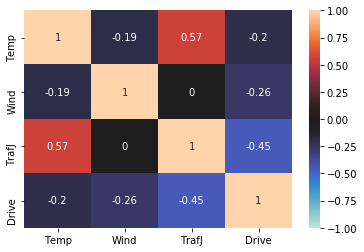

In [14]:
sns.heatmap(dfcar.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [63]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = 1)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [65]:
def InfoGain(data,split_attribute_name,target_name="class"):

    tentropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [66]:
entropy(t1)

0.9402859586706311

In [67]:
InfoGain(dfcar,'Temp','Drive')

0.02922256565895487

In [68]:
InfoGain(dfcar,'Wind','Drive')

0.04812703040826949

In [69]:
InfoGain(dfcar,'TrafJ','Drive')

0.15183550136234159

In [15]:
# b) Choose the root node for the decision tree.
# because the information gain is so much higher in the Trafiic Jam length variable it is safe to
# say we should start there.

In [ ]:
# c) Plot a partial decision tree from root node along with training examples sorted to each of 
# its descendent nodes.

In [114]:
ftree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1).fit(features,target)

In [115]:
text_representation = tree.export_text(ftree)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- class: 1
|--- feature_2 >  1.50
|   |--- class: 0



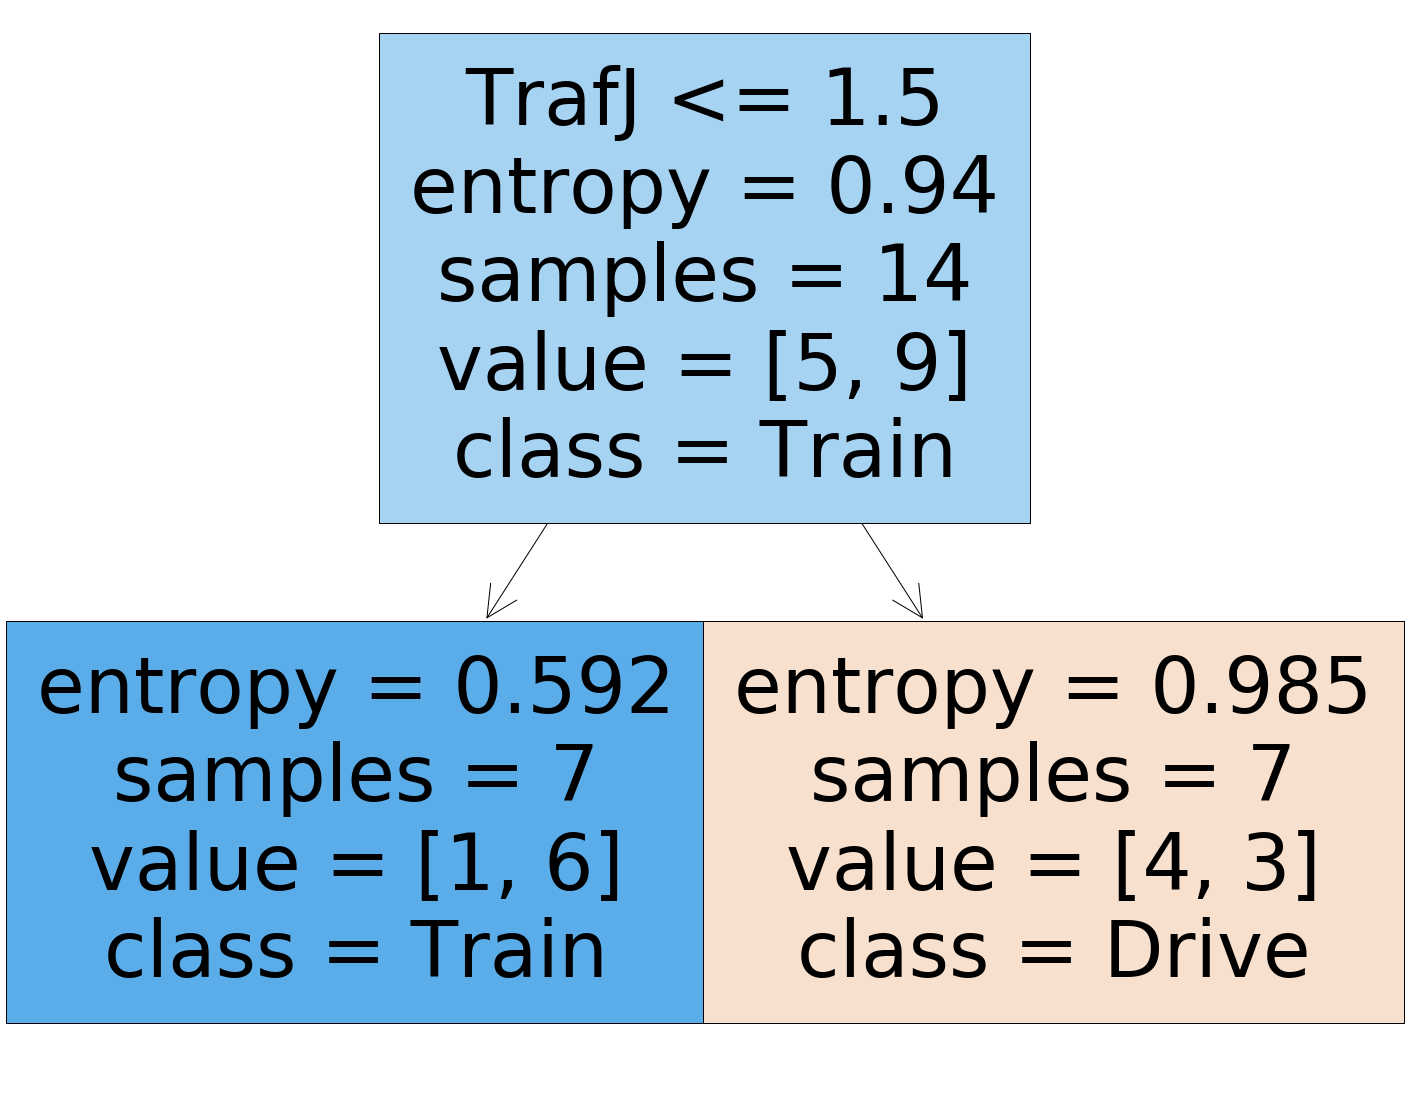

In [116]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ftree, feature_names = features.columns,
                   class_names= ("Drive","Train"),
                   filled=True)

In [ ]:
# d)You are required to continue with the decision-tree growing process until all nodes are pure 
# (they contain examples that all have the same classification). 

In [117]:
ftree2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(features,target)

In [118]:
text_representation = tree.export_text(ftree2)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- feature_1 <= 1.50
|   |   |--- class: 1
|   |--- feature_1 >  1.50
|   |   |--- class: 1
|--- feature_2 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- class: 0



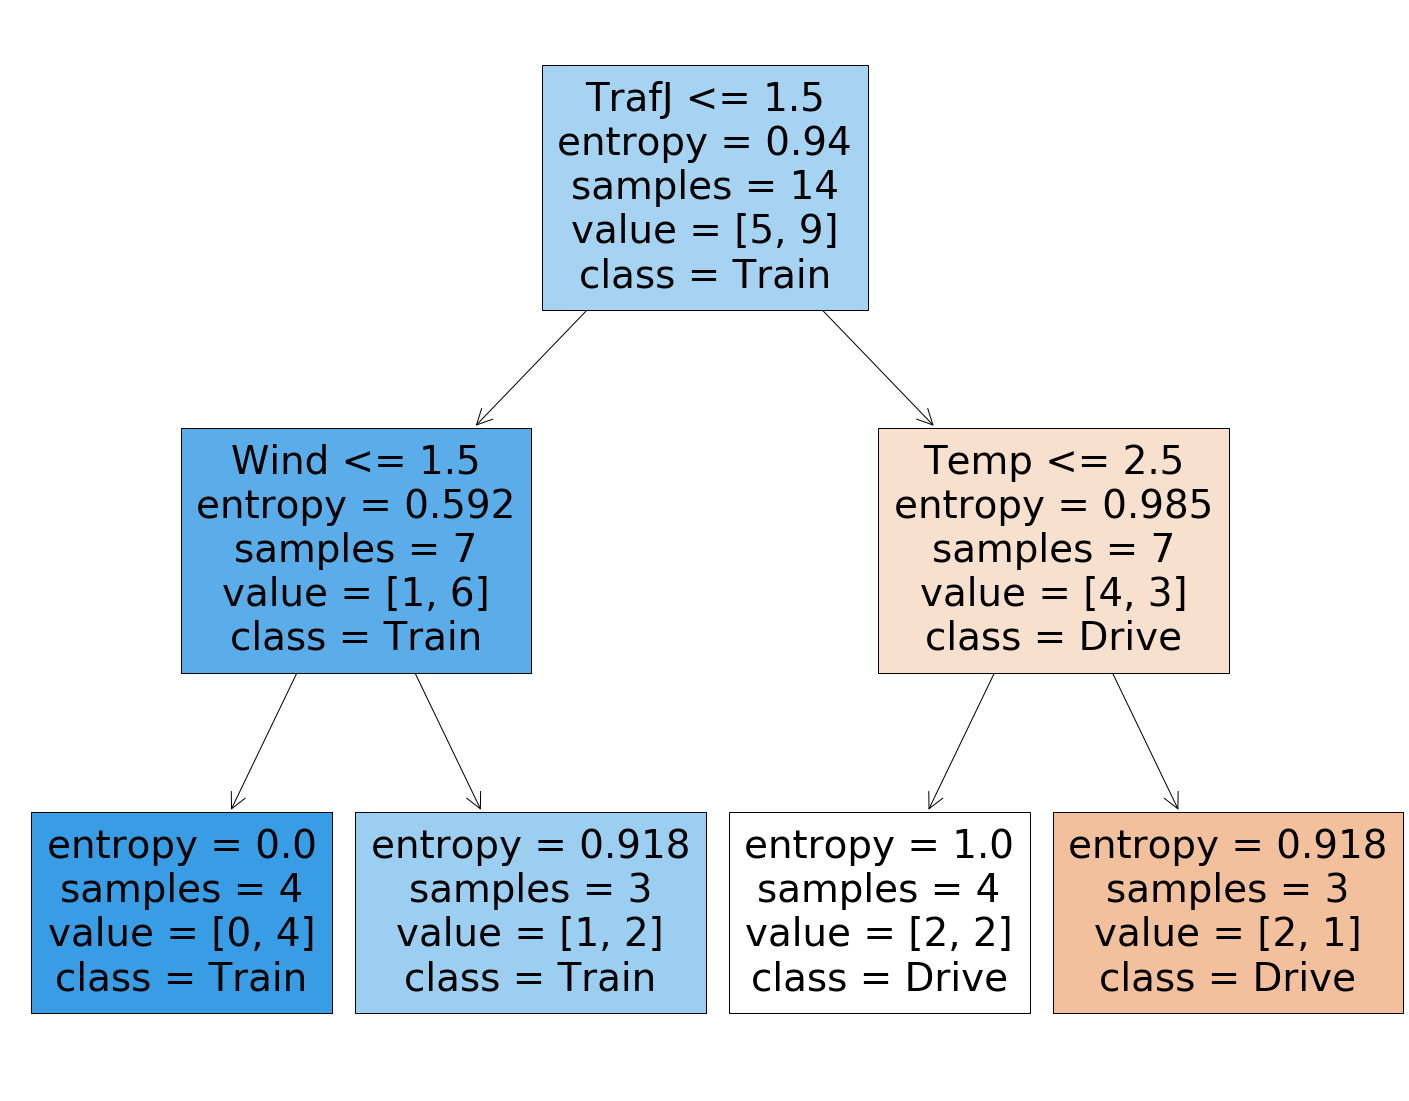

In [119]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ftree2, feature_names = features.columns,
                   class_names= ("Drive","Train"),
                   filled=True)

In [120]:
ftree3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3).fit(features,target)

In [121]:
text_representation = tree.export_text(ftree3)
print(text_representation)

|--- feature_2 <= 1.50
|   |--- feature_1 <= 1.50
|   |   |--- class: 1
|   |--- feature_1 >  1.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 1
|--- feature_2 >  1.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: 0



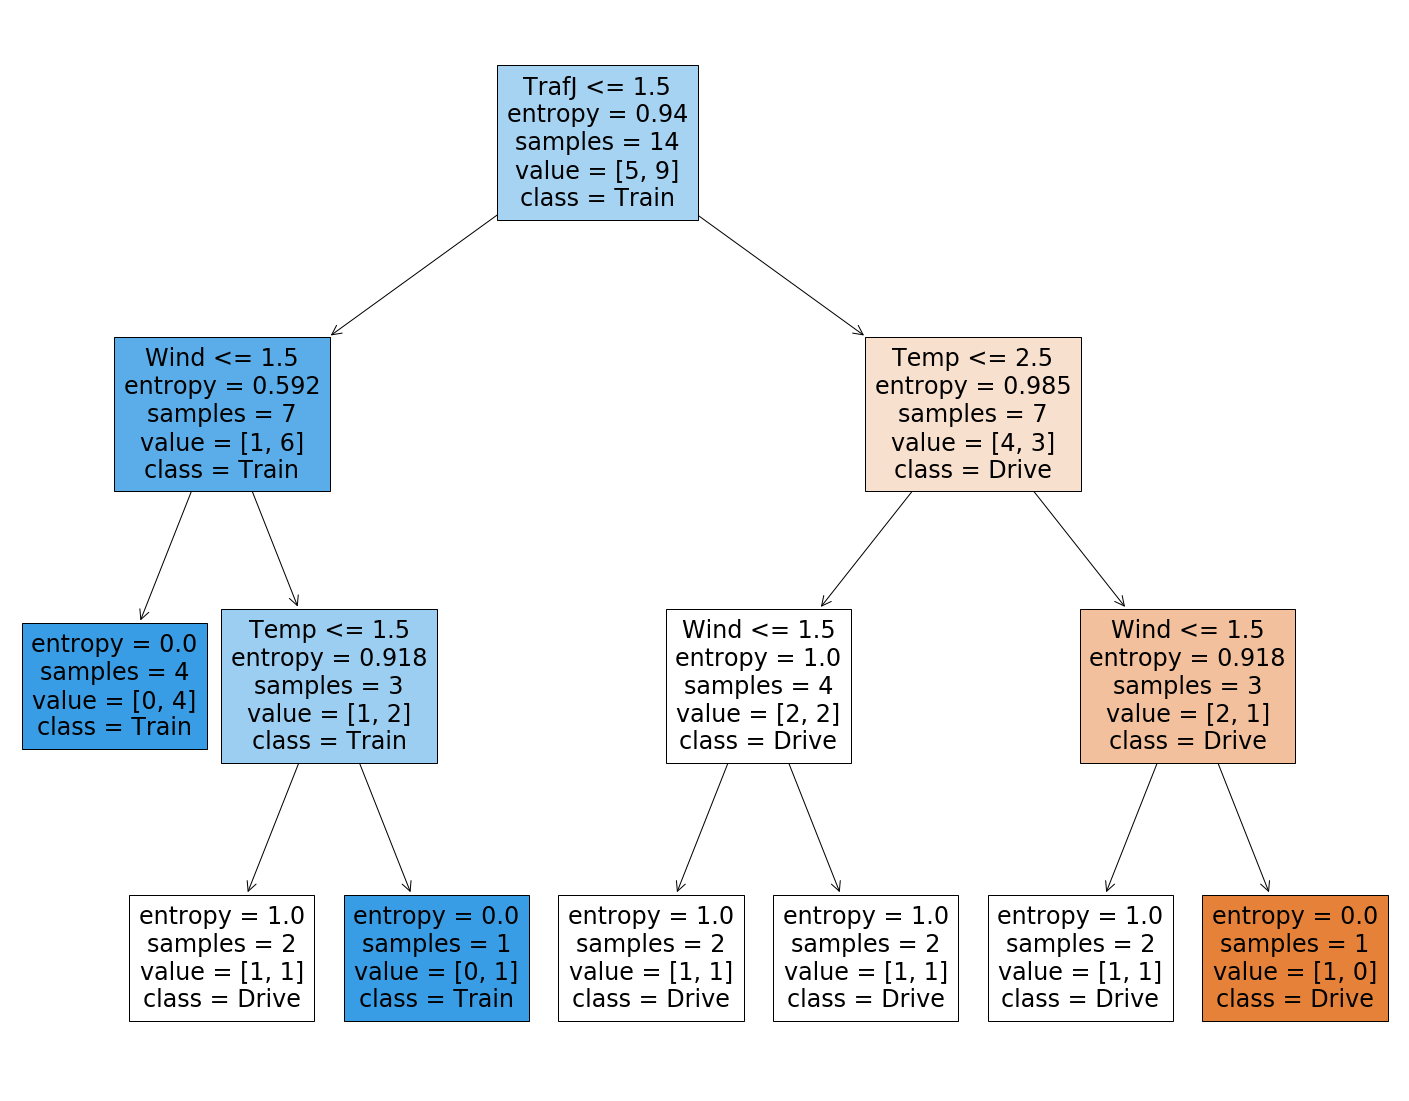

In [122]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(ftree3, feature_names = features.columns,
                   class_names= ("Drive","Train"),
                   filled=True)

In [ ]:
# e) We Grow the decision tree 3 times before we reach perfect entropy and we can never
# really reach the point of pureness simply because of the data set and its inconsistencies.
# specifically when we look at days 12 and 14 or 6 and seveb whos features are presented the same 
# but the results differ.